In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from edu.javerianacali.create_dataset import CreateDataSet
from edu.javerianacali.model.ccn_model import ConvulationalNeuralNetwork
from edu.javerianacali.model.logistic_regression_model import LogisticRegressionModel
from edu.javerianacali.process_images import ProcessImages
from edu.javerianacali.data_aumentation import DataAugmentation
from edu.javerianacali.model.svm_model import SupportVectorMachineModel
directorio = "/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets"


2024-05-31 16:50:04.508786: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 16:50:04.511488: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 16:50:04.545379: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 16:50:05.232501: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# AUMENTO DE DATOS

In [2]:
# Cargar el modelo desde un archivo
from keras.models import load_model
modelo = load_model('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')

2024-04-07 15:05:51.893057: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-07 15:05:51.948649: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-07 15:05:51.988393: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-07 15:05:52.731942: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-07 15:05:52.956881: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.


Type: <class 'numpy.ndarray'>
Shape of Image: (1100, 1200, 3)
Total Number of pixels: 3960000
Image data type: uint8
Dimension: 3


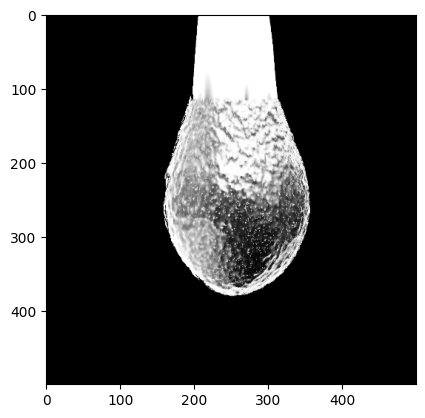

1/1 [==============================] - 0s 54ms/step
[[0.18644099 0.81355906]]


In [10]:

from keras.preprocessing import image
import numpy as np
# Load and preprocess the image
img_path = '/home/maucasco/Downloads/buena.png'
imagen = cv2.imread(img_path)[100:, :]
imagen_sin_texto,aguacate_solo, redimenciada = ProcessImages().procesar(imagen,500,500)
img_array = image.img_to_array(redimenciada)
if img_array.shape[-1] != 3:
    img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

plt.imshow(redimenciada, cmap='gray')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = modelo.predict(img_array)
print(predictions)

# PROCESAR INAGENES PARA MODELOS DE APRENDIZAJE SUPERVISADO

In [ ]:
path=directorio+'/poquitas'
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith(".JPG") or archivo.endswith(".jpg"):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,96)
        ProcessImages().mostrar_imagenes(titulos, imagenes)



In [ ]:
create_dataset = CreateDataSet().create_dataset(directorio)
LogisticRegressionModel().prepare_dataset(directorio)
print(create_dataset[1])
LogisticRegressionModel().train_model(create_dataset[0], create_dataset[1])



In [ ]:


from edu.javerianacali.model.svm_model import SupportVectorMachineModel
create_dataset = CreateDataSet().create_dataset(directorio)
features, labels = create_dataset[0], create_dataset[1]
print(features)
SupportVectorMachineModel().train_svm_model(features, labels)


# ALGORITNOS NO SUPERVISADOS

In [2]:
path=directorio
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith(".JPG") or archivo.endswith(".jpg"):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,200,200)
       # ProcessImages().mostrar_imagenes(titulos, imagenes)



Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets/process/fil_Heilipus (453).jpg
Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets/process/fil_Heilipus (209).jpg
Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets/process/fil_Heilipus (225).jpg
Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets/process/fil_Heilipus (460).jpg
Type

In [3]:

CreateDataSet().create_dataset_cnn(directorio)

['fil_Heilipus (525).jpg', 'fil_Heilipus (539).jpg', 'fil_sano(68).jpg', 'fil_Heilipus (105).jpg', 'fil_Heilipus (84).jpg', 'fil_Heilipus (342).jpg', 'fil_Sano_P13_60 degrees.JPG', 'fil_Sano_P18_100 degrees.JPG', 'fil_Heilipus (277).jpg', 'fil_Heilipus (44).jpg', 'fil_Heilipus (361).jpg', 'fil_Heilipus (262).jpg', 'fil_Sano_sano(564).jpg', 'fil_Heilipus (519).jpg', 'fil_Heilipus (384).jpg', 'fil_Heilipus (110).jpg', 'fil_Heilipus (393).jpg', 'fil_Heilipus (168).jpg', 'fil_Heilipus (13).jpg', 'fil_Heilipus (218).jpg', 'fil_Heilipus (97).jpg', 'fil_Heilipus (107).jpg', 'fil_Heilipus (530).jpg', 'fil_Heilipus (422).jpg', 'fil_Heilipus (79).jpg', 'fil_Heilipus (76).jpg', 'fil_Heilipus (556).jpg', 'fil_Heilipus (248).jpg', 'fil_Heilipus (300).jpg', 'fil_Heilipus (430).jpg', 'fil_Heilipus (39).jpg', 'fil_Heilipus (211).jpg', 'fil_Heilipus (65).jpg', 'fil_Heilipus (274).jpg', 'fil_Heilipus (488).jpg', 'fil_Heilipus (502).jpg', 'fil_Heilipus (297).jpg', 'fil_Heilipus (375).jpg', 'fil_Heilipus 

In [4]:
directorio = "/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from edu.javerianacali.create_dataset import CreateDataSet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt



datagen = ImageDataGenerator(rescale=1./255,shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
print(directorio
+'/train')
generator = datagen.flow_from_directory(
directorio+'/train',
target_size=(200, 200), 
batch_size=32,
class_mode='categorical' ) 


# Generador de datos de validación
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directorio+'/test',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)


/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets/train
Found 464 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


/home/maucasco/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 95, 97, 64)     │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,290,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,396,226 (32.03 MB)

 Trainable params: 8,396,226 (32.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/home/maucasco/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-31 17:02:10.543511: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160579584 exceeds 10% of free system memory.
2024-05-31 17:02:10.642101: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75489280 exceeds 10% of free system memory.
2024-05-31 17:02:10.923333: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75489280 exceeds 10% of free system memory.


 1/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5625 - loss: 0.6943

2024-05-31 17:02:11.163695: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80289792 exceeds 10% of free system memory.
2024-05-31 17:02:11.163791: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160579584 exceeds 10% of free system memory.


15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 818ms/step - accuracy: 0.8000 - loss: 0.6323 - val_accuracy: 0.9800 - val_loss: 0.1352
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 808ms/step - accuracy: 0.9412 - loss: 0.2837 - val_accuracy: 0.9700 - val_loss: 0.1493
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 807ms/step - accuracy: 0.9631 - loss: 0.2045 - val_accuracy: 0.9700 - val_loss: 0.1153
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 821ms/step - accuracy: 0.9622 - loss: 0.1725 - val_accuracy: 0.9700 - val_loss: 0.1109
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.9579 - loss: 0.1949 - val_accuracy: 0.9700 - val_loss: 0.1087
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 802ms/step - accuracy: 0.9591 - loss: 0.1615 - val_accuracy: 0.9750 - val_loss: 0.1136
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 803ms/step - accuracy: 0.9632 - loss: 0.1265 - val_accuracy: 0.9700 - val_loss: 0.1060
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 802ms/step - accuracy: 0.9720 - loss: 0.1334 - val_accuracy: 0.970

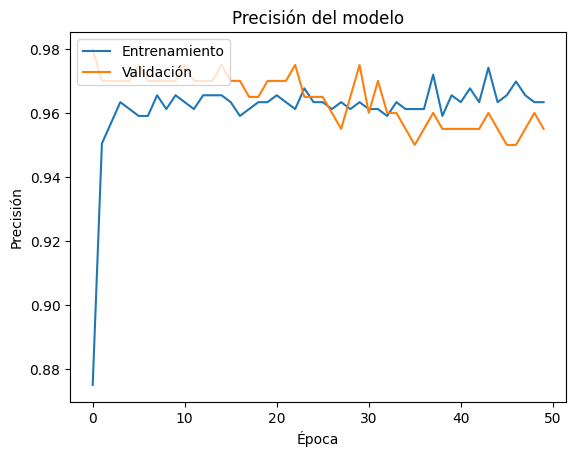

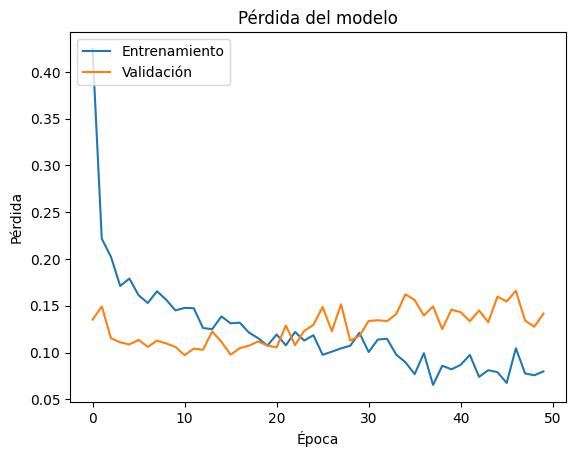

In [5]:
import tensorflow as tf
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
modelo = Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, (5,3), activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(128, (3, 3), activation='relu'), # Capa adicional
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),  # Capa de abandono para regularización
            Dense(2, activation='softmax')
        ])


# Aquí puedes imprimir la forma de la salida para ver cuántas neuronas necesita la siguiente capa Dense
modelo.summary()


modelo.compile(optimizer=Adam(learning_rate=0.001),  # Ajustar la tasa de aprendizaje
    loss='categorical_crossentropy',  
    metrics=['accuracy'])


historial = modelo.fit(
    generator,
    epochs=50,  # Aumentar el número de épocas
    validation_data=validation_generator,
    batch_size=32
)

# Gráficos de precisión y pérdida
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])  # Precisión de validación
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])  # Pérdida de validación
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')# Añade la capa Dense según el tamaño de salida de Flatten


plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
plot_model(modelo, to_file='/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo1_cnn.png', show_shapes=True, show_layer_names=True)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
[[9.9990553e-01 9.4396790e-05]
 [1.6905864e-05 9.9998301e-01]
 [9.9964422e-01 3.5588571e-04]
 [1.9830873e-06 9.9999791e-01]
 [9.9999994e-01 4.1804520e-12]
 [9.9759775e-01 2.4022760e-03]
 [9.9854970e-01 1.4502598e-03]
 [7.3688135e-02 9.2631185e-01]
 [1.7534301e-05 9.9998242e-01]
 [9.8862046e-01 1.1379516e-02]
 [8.4554768e-01 1.5445240e-01]
 [9.9995846e-01 4.1457301e-05]
 [9.9815774e-01 1.8421637e-03]
 [9.9832201e-01 1.6778717e-03]
 [9.9972689e-01 2.7300490e-04]
 [9.9999279e-01 7.1305008e-06]
 [9.9999970e-01 2.1138165e-07]
 [9.9985123e-01 1.4886177e-04]
 [9.9999994e-01 1.6956923e-08]
 [9.9583322e-01 4.1667470e-03]
 [9.9893421e-01 1.0658255e-03]
 [8.0196983e-01 1.9803008e-01]
 [9.9949259e-01 5.0734123e-04]
 [6.2184721e-01 3.7815282e-01]
 [8.9608324e-01 1.0391674e-01]
 [9.9999052e-01 9.4079678e-06]
 [9.9995548e-01 4.4494962e-05]
 [9.9539357e-01 4.6063350e-03]
 [9.9997455e-01 2.5401934e-05]
 [9.8189962e-01 1.8100334e-02]
 [9.9892712e-01 1.0728913e-03]


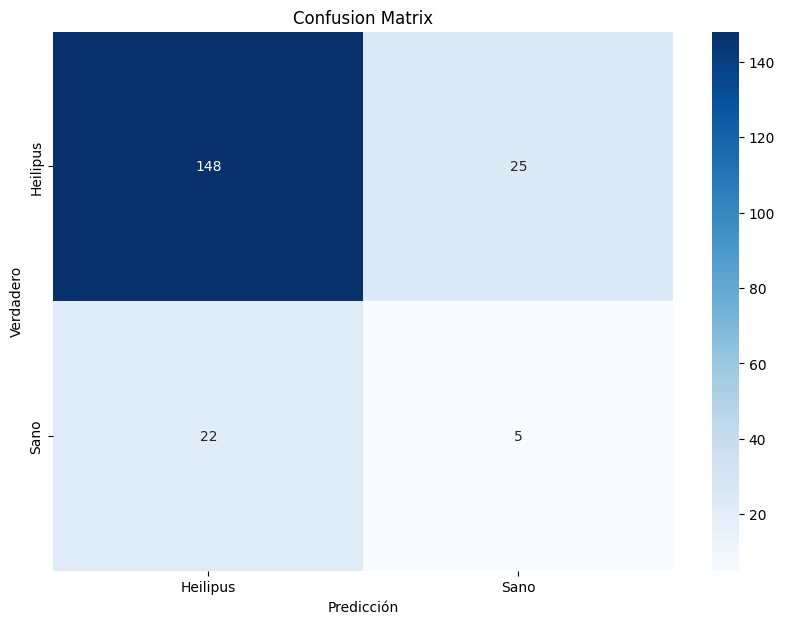

Classification Report
{'0': {'precision': 0.8705882352941177, 'recall': 0.8554913294797688, 'f1-score': 0.8629737609329446, 'support': 173.0}, '1': {'precision': 0.16666666666666666, 'recall': 0.18518518518518517, 'f1-score': 0.17543859649122806, 'support': 27.0}, 'accuracy': 0.765, 'macro avg': {'precision': 0.5186274509803922, 'recall': 0.520338257332477, 'f1-score': 0.5192061787120863, 'support': 200.0}, 'weighted avg': {'precision': 0.7755588235294119, 'recall': 0.765, 'f1-score': 0.7701565137333128, 'support': 200.0}}


,precision,recall,f1-score,support
0,0.870588,0.855491,0.862974,173.000000
1,0.166667,0.185185,0.175439,27.000000
accuracy,0.765000,0.765000,0.765000,0.765000
macro avg,0.518627,0.520338,0.519206,200.000000
weighted avg,0.775559,0.765000,0.770157,200.000000


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
# Evaluar el modelo en el conjunto de prueba o validación
# Asumiendo que tienes `validation_generator` como tu conjunto de validación/test
y_pred = modelo.predict(validation_generator)
y_test = validation_generator.classes  # Etiquetas verdaderas
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)  # esto cambia por que es una sola neurona hardlim   
print(y_pred)
print(y_test)
# Matriz de confusiónvalidation_generator
print("Confusion Matrix")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Obtener nombres de clases desde el generador
class_names = list(validation_generator.class_indices.keys())
print(class_names)
# Visualización de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Confusion Matrix')
plt.show()


# Informe de clasificación

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report")
print(report)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report_cnn.csv', index=True)

cm = sns.light_palette("blue", as_cmap=True)
styled_df = report_df.style.background_gradient(cmap=cm)
display(styled_df)


In [ ]:
# Si y_pred es unidimensional, no necesitas indexarlo con [:, 1]
if y_pred.ndim == 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Visualización de la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
from keras.models import Model
import matplotlib.pyplot as plt

# Crear un modelo que devuelva las activaciones de la primera capa convolucional
activation_model = Model(inputs=modelo.input, outputs=modelo.layers[0].output)

# Obtener las activaciones de la primera capa convolucional para la primera imagen en el conjunto de entrenamiento
activations = activation_model.predict(generator[0][0][0].reshape(1, 500, 500, 3))

# Visualizar las activaciones de los primeros 6 filtros
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.show()

ValueError: The layer sequential has never been called and thus has no defined input.

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Suponiendo que tienes todas tus imágenes y etiquetas cargadas en X e Y
# X, Y = load_data()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

fold_no = 1
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Crear el modelo de CNN aquí
    modelo = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(100, 130, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])

    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

    # Evaluar el modelo
    scores = modelo.evaluate(X_val, Y_val, verbose=0)
    print(f'Score for fold {fold_no}: {modelo.metrics_names[1]} of {scores[1]*100}%')
    
    fold_no += 1

In [ ]:
# Guardar el modelo en un archivo
modelo.save('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')


In [ ]:
# Cargar el modelo desde un archivo
from keras.models import load_model
modelo = load_model('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')

In [ ]:

from keras.preprocessing import image
import numpy as np
# Load and preprocess the image
img_path = '/home/maucasco/Downloads/sano_tomadas.jpeg'
imagen = cv2.imread(img_path)[100:, :]
imagen_sin_texto,aguacate_solo, redimenciada = ProcessImages().procesar(imagen,500,500)
img_array = image.img_to_array(redimenciada)
if img_array.shape[-1] != 3:
    img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

plt.imshow(redimenciada, cmap='gray')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = modelo.predict(img_array)
print(predictions)